# Training notebook

The goal of this notebook is to obtain pictures generated by the Pix2Pix model at different stages of training.

### 0. Libraries and dataset

In [1]:
import utils
import model

In [2]:
# set dataset name
dataset_name = 'facades'

## I. No transformation, batch size of 1

### 1. Instantiate dataloaders

In [3]:
# instantiate datasets and dataloaders
datasets = {mode: utils.ImageDataset(dataset_name = dataset_name, transform=None, mode = mode) for mode in ['train', 'val']}
dataloaders = {'train': utils.DataLoader(datasets['train'], batch_size=1, shuffle=True),
                    'val': utils.DataLoader(datasets['val'], batch_size=1, shuffle=False)}

### 2. Create model

In [4]:
# instantiate model
p2p = model.Pix2Pix().to(utils.device)

### 3. Train

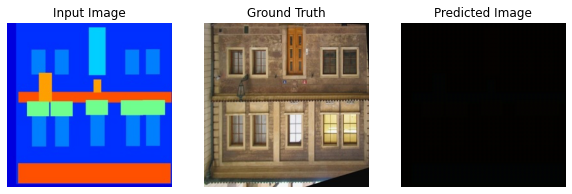

Epoch 1/200
----------


KeyboardInterrupt: 

In [5]:
history = utils.train(model = p2p,
            n_epochs = 200, 
            display_step = 20, 
            save_step = 20,
            dataloaders = dataloaders, 
            filename = 'facades_long',
            lr = 2e-4, 
            lbd = 200, 
            loss_l1_true = True,
            loss_l2_true = False,
            loss_cGAN_true = True) 

## II. Plot image side by side

In [24]:
import utils
import model
import torch

In [33]:
input_val, real_val = datasets['val'].__getitem__(20)

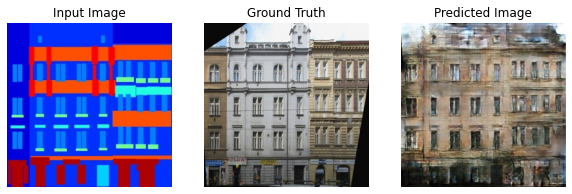

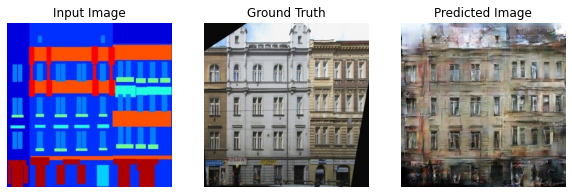

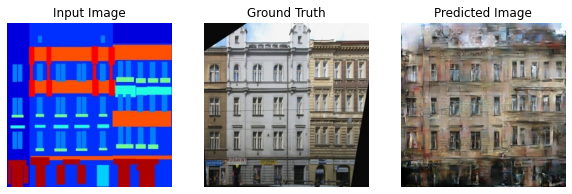

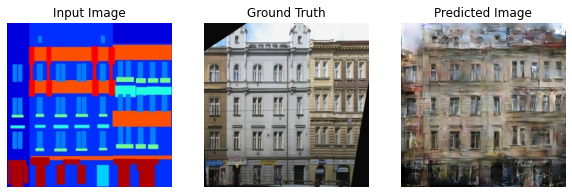

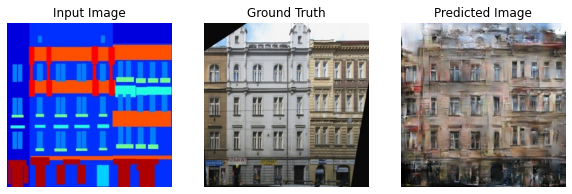

In [34]:
# create model
p2p = model.Pix2Pix().to(utils.device)

for i in range(49,299,50):
    # load state dict
    p2p.load_state_dict(torch.load(utils.weights_path + '/' + 'facades_long_ep' + str(i) + '.pkl'))
    utils.generate_images(model = p2p, input = input_val[None, :], real = real_val[None, :])